In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r'/kaggle/input/avocado-prices/avocado.csv' , index_col = 'Unnamed: 0')

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# **changing the date time object and breaks it into month and year**

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [7]:
df['date'] = pd.DatetimeIndex(df['Date']).date

In [8]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [9]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12-27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12-20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12-13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12-06,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11-29,11


In [10]:
df = df.drop(['date'],axis = 1)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


# **EDA**

In [12]:
avg_price_df = pd.DataFrame(df.groupby('year')['AveragePrice'].mean())

<Axes: xlabel='year', ylabel='AveragePrice'>

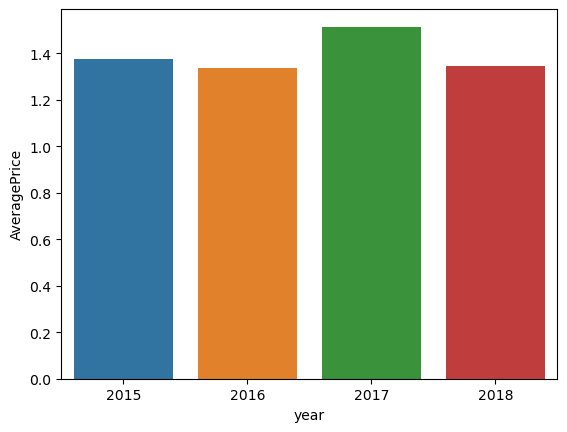

In [13]:
sns.barplot(avg_price_df , x = avg_price_df.index , y = 'AveragePrice')

> **insight :- the year 2017 gets the maximum average price of avocado**

In [14]:
tot_vol_df = pd.DataFrame(df.groupby('year')['Total Volume'].mean())

In [15]:
tot_vol_df

,Total Volume
year,
2015,7.810274e+05
2016,8.584206e+05
2017,8.623393e+05
2018,1.066928e+06


<Axes: xlabel='year', ylabel='Total Volume'>

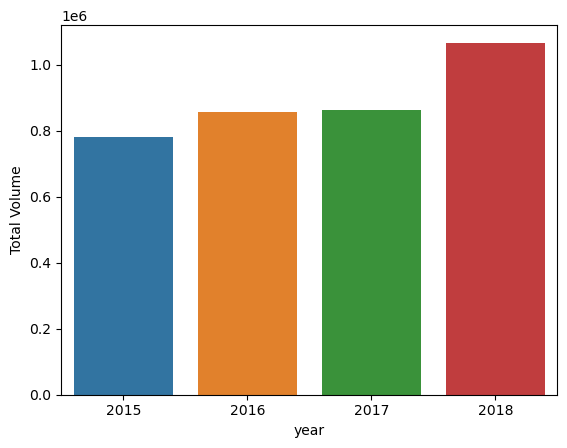

In [16]:
sns.barplot(tot_vol_df , x = tot_vol_df.index , y = 'Total Volume')

> **insight:- total volume of avocado sold in 2018 is maximum**

In [17]:
for066_sold_df = pd.DataFrame(df.groupby('year')['4046'].mean())

In [18]:
for066_sold_df

,4046
year,
2015,304443.451708
2016,271567.466578
2017,288716.905194
2018,355323.868904


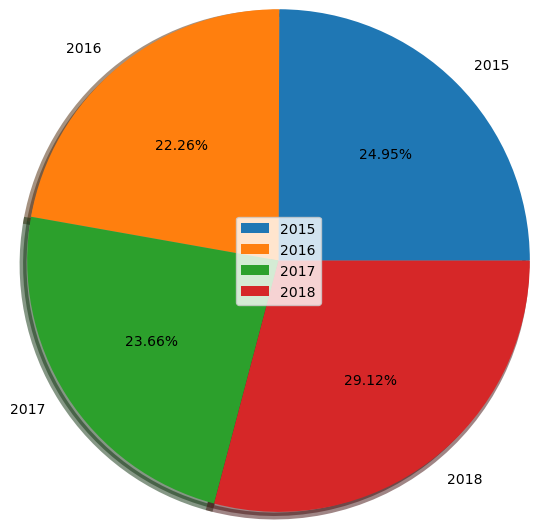

In [19]:
plt.pie(for066_sold_df['4046'],labels = for066_sold_df.index,shadow = True , autopct= "%0.2f%%",radius = 1.7,labeldistance=1.1,startangle = 0
       , textprops = {'fontsize':10},wedgeprops = {'linewidth':5});
plt.legend(loc =10)

> **insight:- in the year of 2018 we got maximum sale of PLU marked 4046**

In [20]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [21]:
for225_df = pd.DataFrame(df.groupby('year')['4225'].mean())

In [22]:
for225_df

,4225
year,
2015,313633.844367
2016,297850.478632
2017,269964.124350
2018,314628.606698


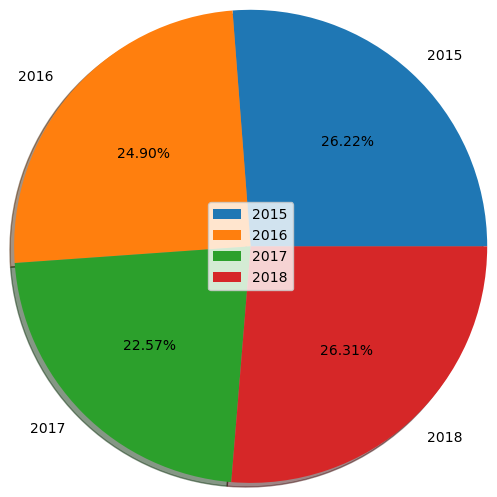

In [23]:
plt.pie(for225_df['4225'] , labels = for225_df.index ,shadow = True , autopct = "%0.2f%%" , radius = 1.6);
plt.legend(loc = 10)

> **insight:- we got max sale of avocado having lot number 4225 in 2015 and 2018**

In [24]:
for770_df = pd.DataFrame(df.groupby('year')['4770'].mean())

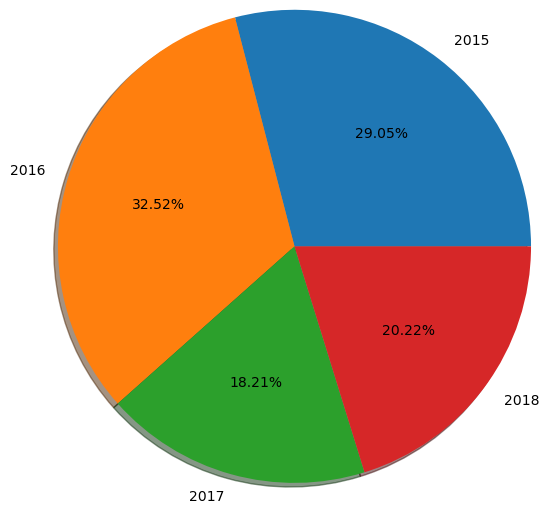

In [25]:
plt.pie(for770_df['4770'] , labels = for770_df.index,autopct = "%0.2f%%" , radius = 1.6 , shadow = True);

> **insight:- we got max number of avocado sale having lot number 4770 in the year of 2016**

# **Type of avocado present in our dataset**

<Axes: xlabel='type', ylabel='count'>

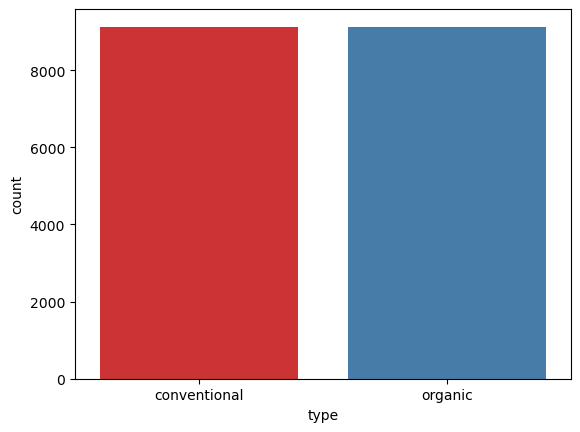

In [26]:
sns.countplot(df,x = 'type' , palette = 'Set1')

# **how much avg volume of each type of avocado is sold as of now**

<Axes: xlabel='Total Volume', ylabel='type'>

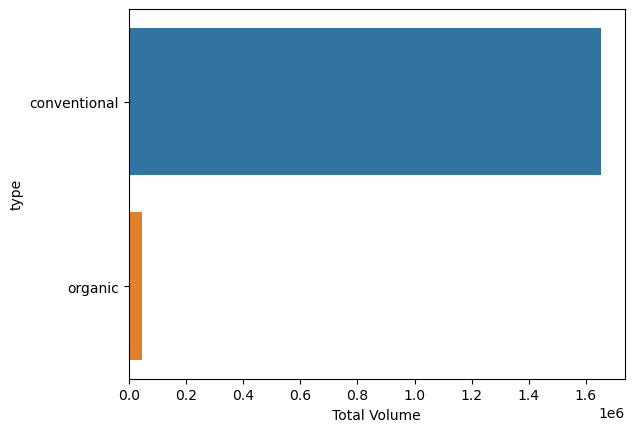

In [27]:
type_df = pd.DataFrame(df.groupby('type')['Total Volume'].mean())
sns.barplot(type_df , x = 'Total Volume' , y = type_df.index)

> **insight:- max of them are conventional in type**

# **Which one of types of avocado has maximum number of average unit price**

<Axes: xlabel='type', ylabel='AveragePrice'>

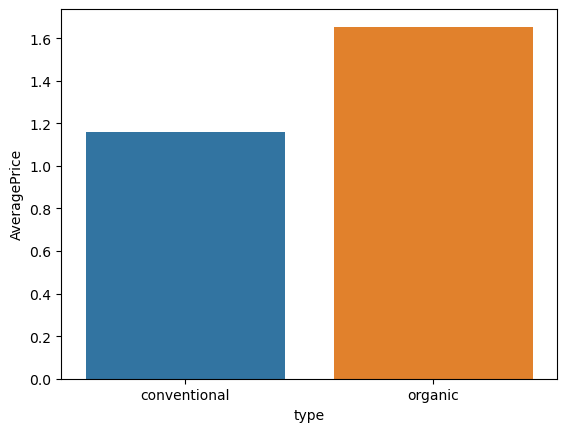

In [28]:
unit_df = pd.DataFrame(df.groupby('type')['AveragePrice'].mean())
sns.barplot(unit_df , x = unit_df.index , y = unit_df['AveragePrice'])

# **How many number of total bags is sold in 2015 and for each type of avocado**

In [29]:
df1 = df[df['year'] == 2015]

In [30]:
yar_wise_df = pd.DataFrame(df1.groupby(['year' , 'Month' , 'type'])['Total Bags'].mean()).reset_index()
yar_wise_df

,year,Month,type,Total Bags
0,2015,1,conventional,228013.073426
1,2015,1,organic,6661.454630
2,2015,2,conventional,244287.283796
3,2015,2,organic,8824.018102
4,2015,3,conventional,247871.457148
5,2015,3,organic,7373.343074
6,2015,4,conventional,261648.743796
7,2015,4,organic,8064.359815
8,2015,5,conventional,283281.166000
9,2015,5,organic,9572.016556


<Axes: xlabel='Month', ylabel='Total Bags'>

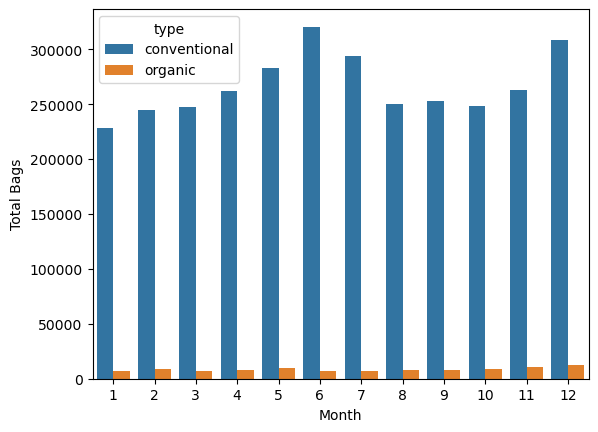

In [31]:
sns.barplot(yar_wise_df,x = 'Month', y = 'Total Bags',hue = 'type')

> **insight:- maximum month have got maximum conventional avocado bags sale**

# **trend of bag volume they have used in 4 years and months**

In [32]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [33]:
df['volume_per_bag'] = df['Total Volume']/df['Total Bags']

In [34]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,volume_per_bag
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,7.386177
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,5.773145
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,14.513829
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,13.593181
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,8.253560


In [35]:
bag_volume = pd.DataFrame(df.groupby(['year'])['volume_per_bag'].mean())

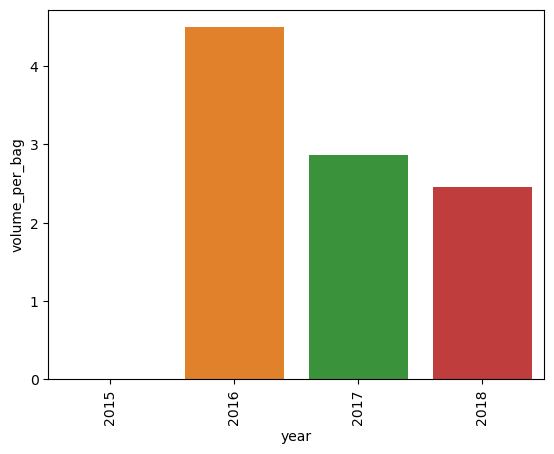

In [36]:
sns.barplot(bag_volume , x = bag_volume.index , y = 'volume_per_bag')
plt.xticks(rotation = 90);

> **insight:- there are several blank bag in year of 2015 and in the year of 2016 we got maximum volume per bag trend**

# **Region wise total volume distribution**

In [37]:
region_df = pd.DataFrame(df.groupby('region')['Total Volume'].mean()).sort_values(ascending = False,by = 'Total Volume')[0:10]

<Axes: xlabel='Total Volume', ylabel='region'>

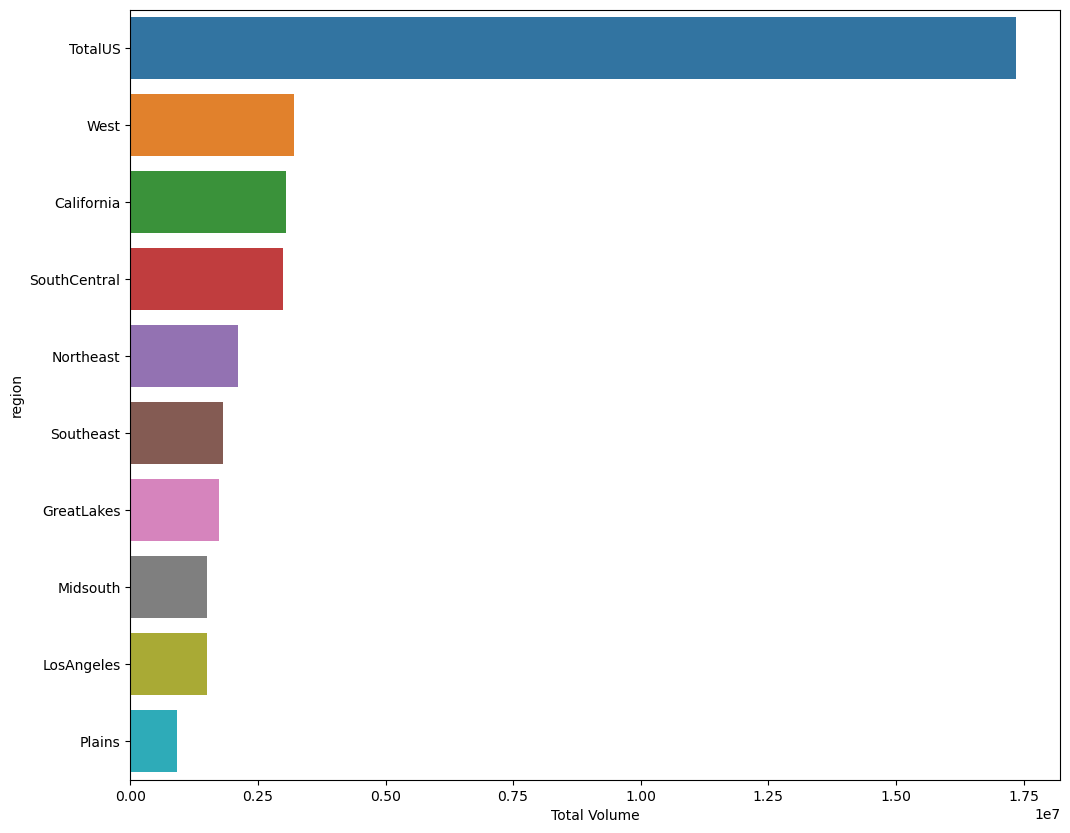

In [38]:
plt.figure(figsize = (12,10) , dpi = 100)
sns.barplot(region_df , x = 'Total Volume' , y = region_df.index)

> **insight:- US is the city that has bought maximum number of avocado**

# **Region wise heighest bag selling**

In [39]:
region_bag = pd.DataFrame(df.groupby('region')['Total Bags'].mean()).sort_values(ascending = False , by = 'Total Bags')[0:10]


<Axes: xlabel='Total Bags', ylabel='region'>

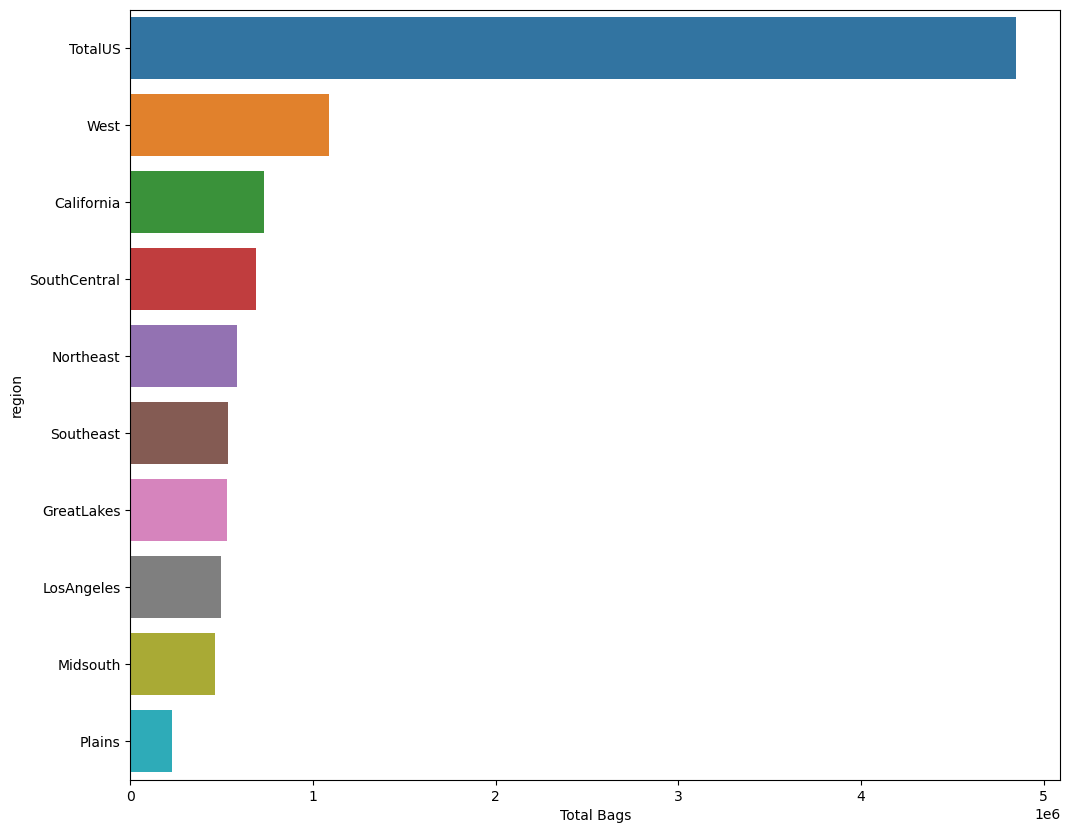

In [40]:
plt.figure(figsize = (12,10) , dpi = 100)
sns.barplot(region_bag , x = 'Total Bags' , y = region_bag.index)

> **insight:- in 4 years on an average US bought the heighest bag of Avocado**

# **Maximum order of avocado bag ordered and their distribution as per the country**

In [41]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,volume_per_bag
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,7.386177
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,5.773145
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,14.513829
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,13.593181
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,8.253560


In [42]:
large_bags_df = pd.DataFrame(df.groupby('region')['Large Bags'].mean()).sort_values(ascending = False , by = 'Large Bags')[0:10]

<Axes: xlabel='Large Bags', ylabel='region'>

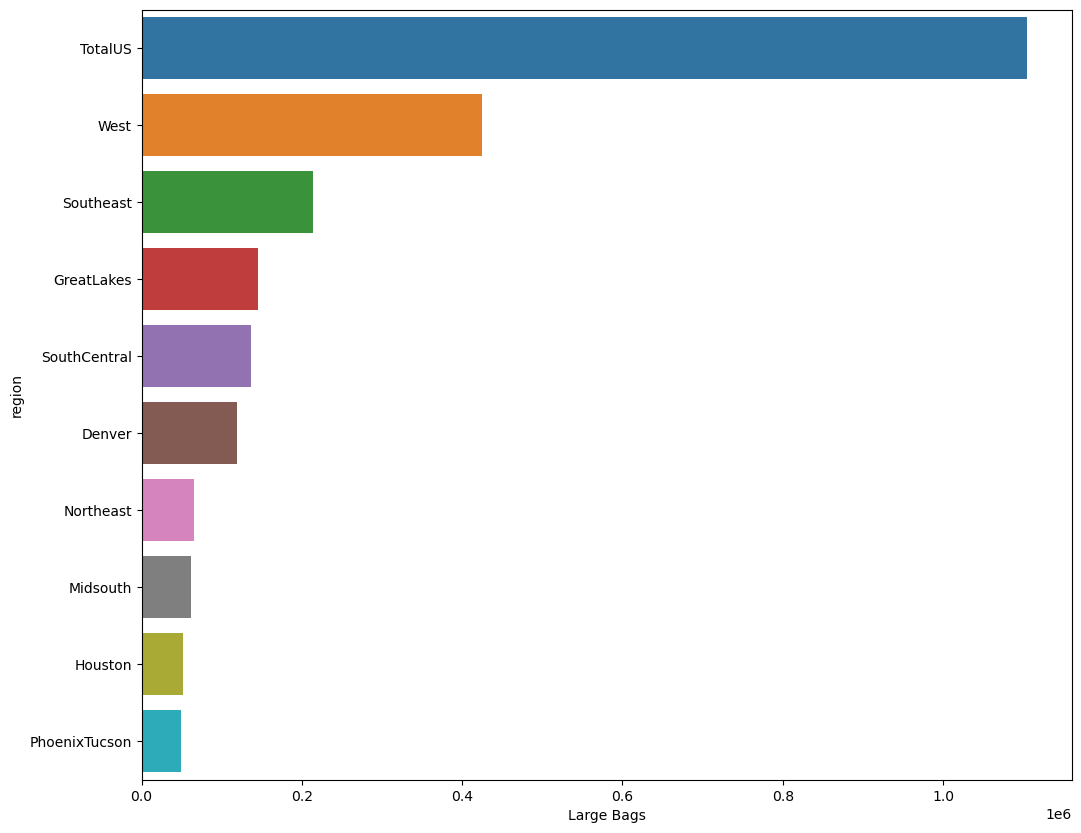

In [43]:
plt.figure(figsize=(12,10) , dpi = 100)
sns.barplot(large_bags_df , x = 'Large Bags' , y = large_bags_df.index)

> **insight;'- in 4 years on an average US have ordered maximum number of large bags of avocado**

In [44]:
small_bags_df = pd.DataFrame(df.groupby('region')['Small Bags'].mean()).sort_values(ascending = False , by = 'Small Bags')[0:10]

<Axes: xlabel='Small Bags', ylabel='region'>

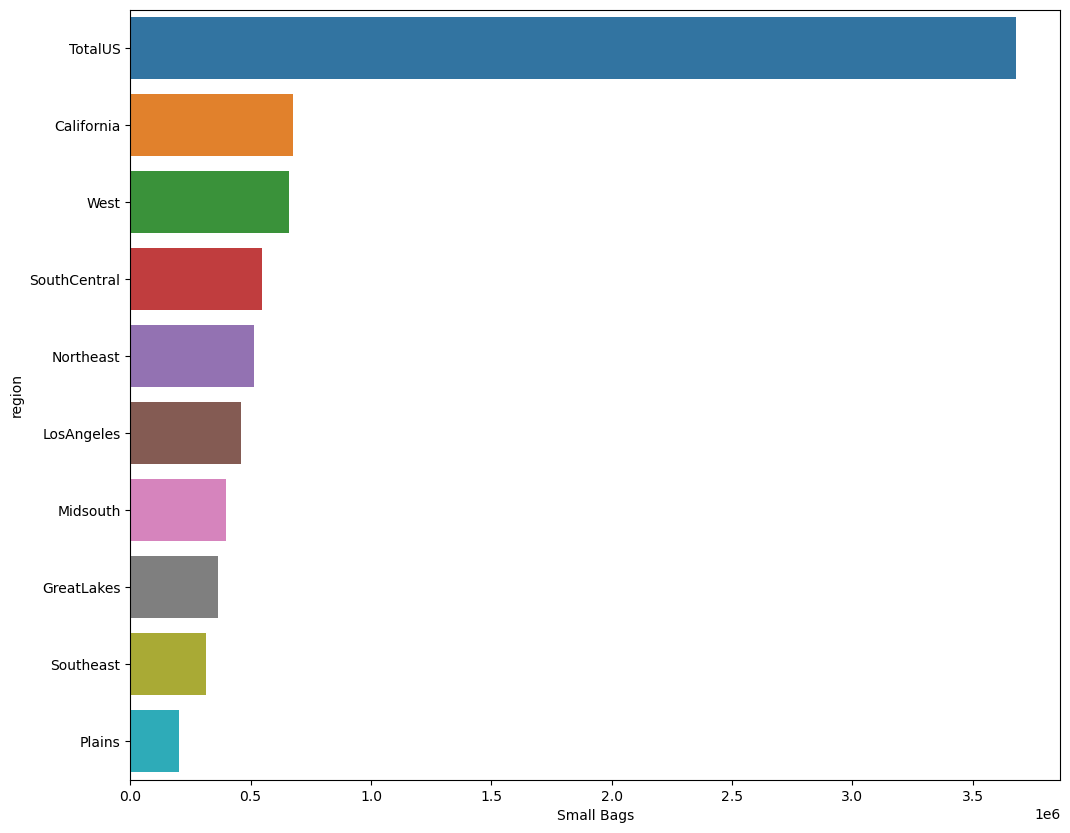

In [45]:
plt.figure(figsize=(12,10) , dpi = 100)
sns.barplot(small_bags_df , x = 'Small Bags' , y = small_bags_df.index)

> **insight:- US have ordered maximum number of small bags of avocado on an average of 4 years**

# **Region wise type of avocado selling**

In [46]:
pd.DataFrame(df.groupby(['region' , 'type'])['type'].count())

type
region              type              
Albany              conventional   169
                    organic        169
Atlanta             conventional   169
                    organic        169
BaltimoreWashington conventional   169
...                                ...
TotalUS             organic        169
West                conventional   169
                    organic        169
WestTexNewMexico    conventional   169
                    organic        166

[108 rows x 1 columns]

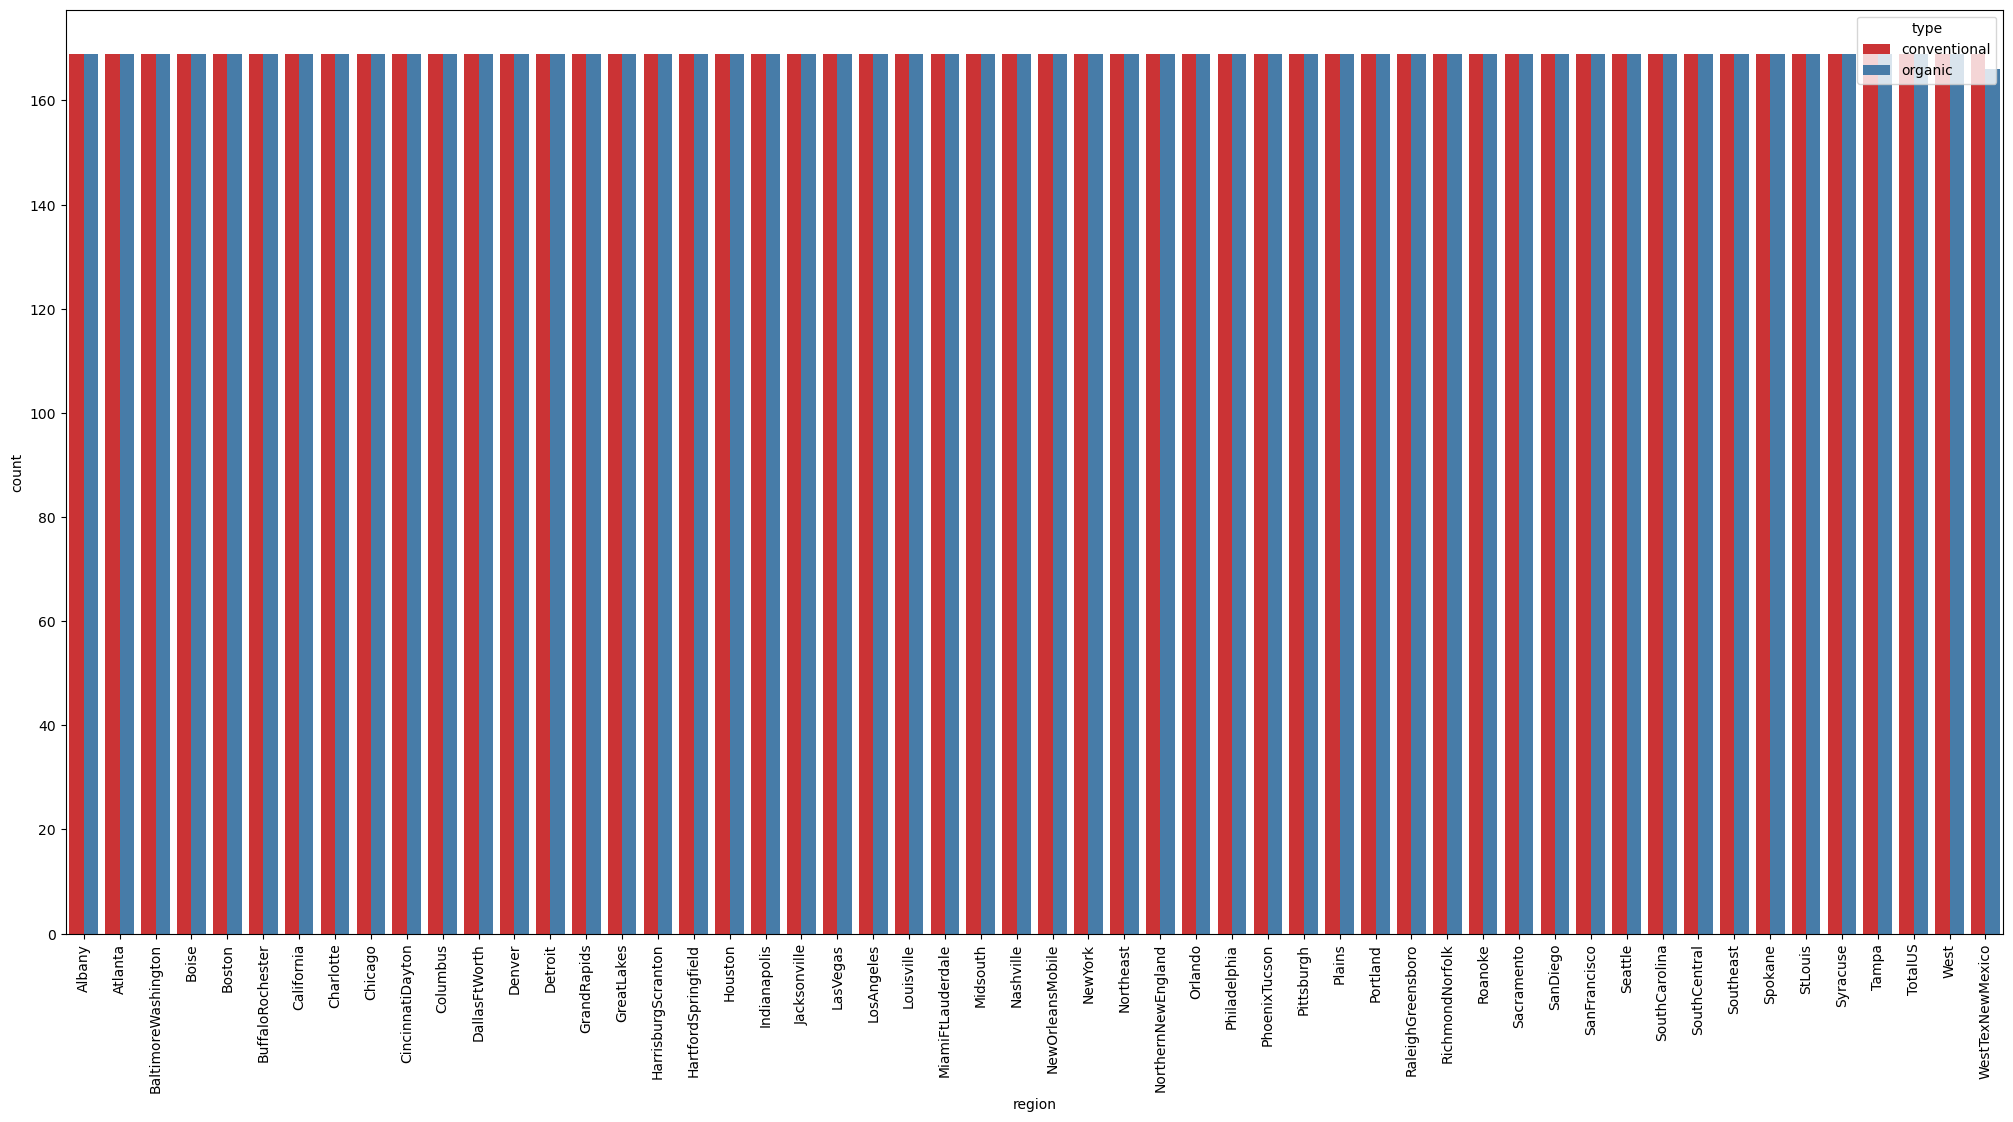

In [47]:
plt.figure(figsize = (25,12))
sns.countplot(df , x = 'region' , hue = 'type' ,palette = 'Set1')
plt.xticks(rotation = 90);

In [48]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,volume_per_bag
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,7.386177
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,5.773145
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,14.513829
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,13.593181
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,8.253560


# **How much bags of each type of avocado has sold out as of now**

In [49]:
type_avocado_df = pd.DataFrame(df.groupby('type')['Total Bags'].sum())

<Axes: xlabel='Total Bags', ylabel='type'>

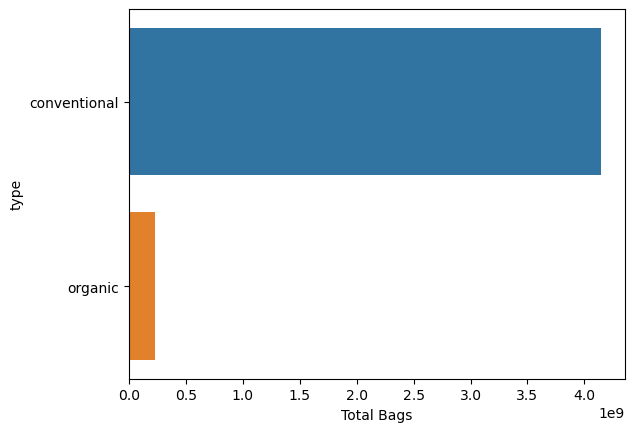

In [50]:
sns.barplot(type_avocado_df , x = 'Total Bags' , y = type_avocado_df.index)

> **insight:-  very less number of organic avocado bags are ordered in 4 years period**

# **trend of avocado total volume ordering of each country as per the year**

In [51]:
trend_df = pd.DataFrame(df.groupby(['region' , 'year'])['Total Volume'].mean()).reset_index()
trend_df

,region,year,Total Volume
0,Albany,2015,3.874900e+04
1,Albany,2016,5.061861e+04
2,Albany,2017,4.935455e+04
3,Albany,2018,6.424942e+04
4,Atlanta,2015,2.233817e+05
...,...,...,...
211,West,2018,3.853212e+06
212,WestTexNewMexico,2015,4.031456e+05
213,WestTexNewMexico,2016,4.212253e+05
214,WestTexNewMexico,2017,4.556691e+05


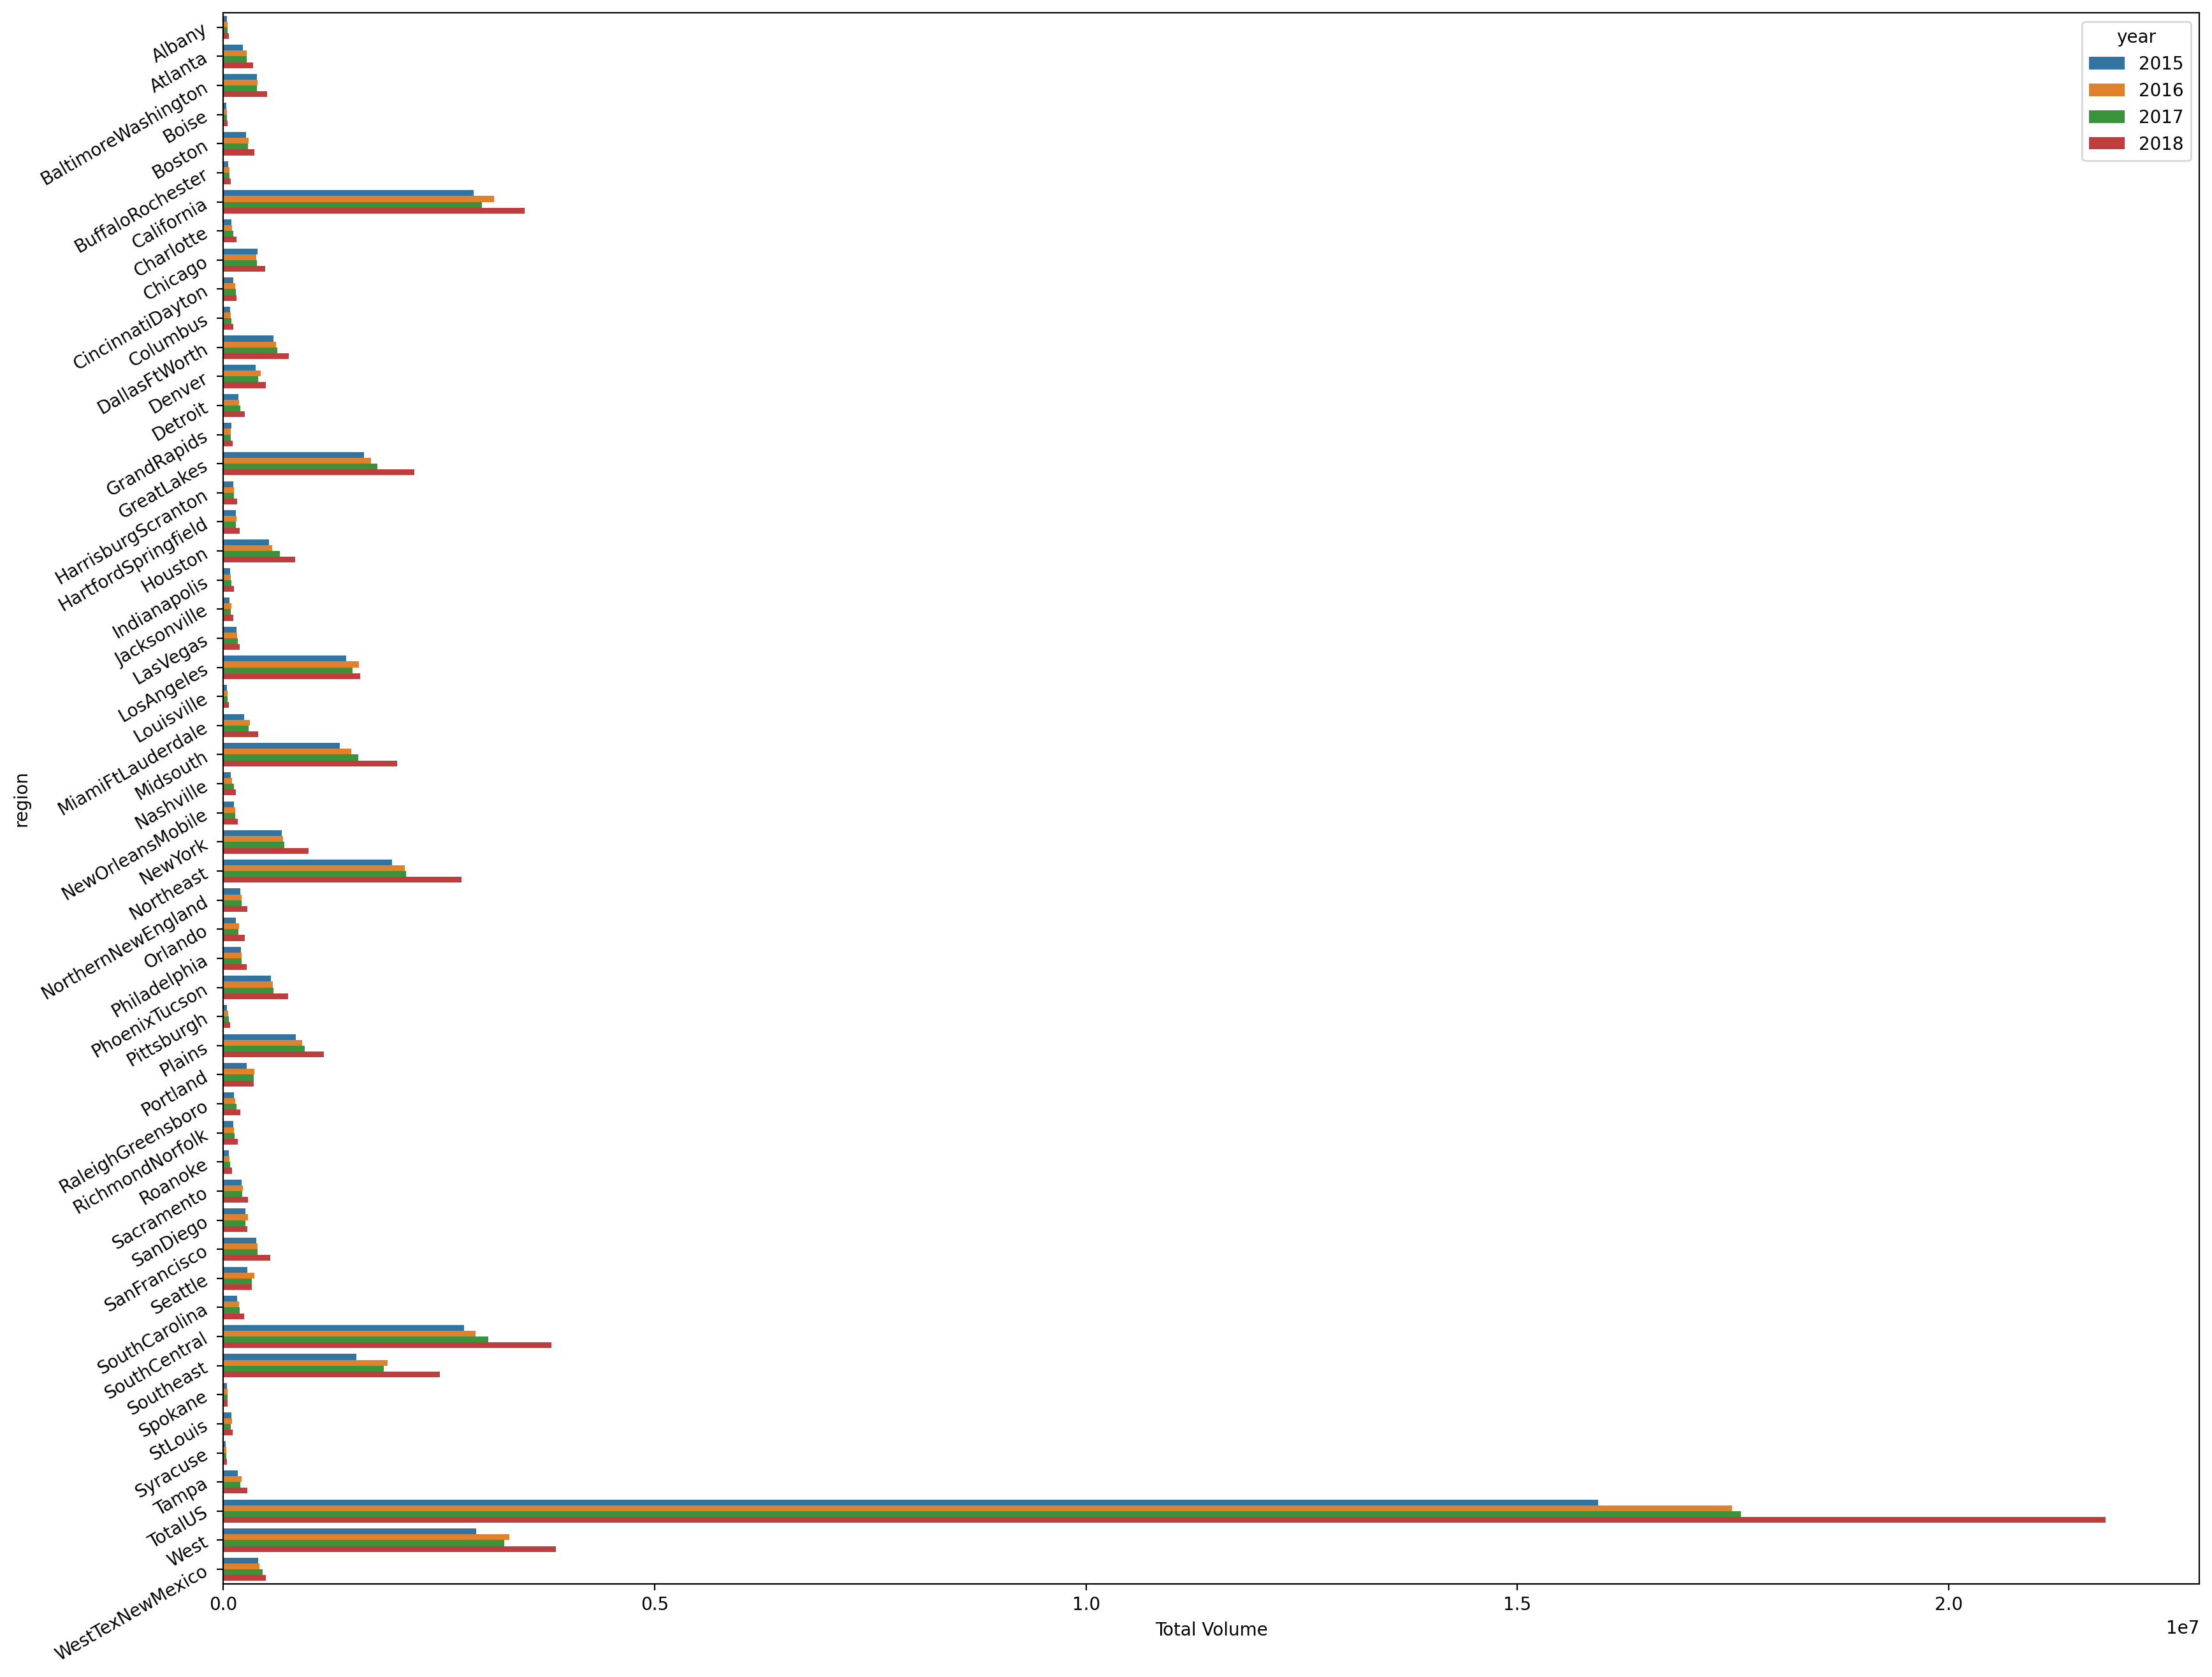

In [52]:
plt.figure(figsize=(20,16) , dpi = 200)
sns.barplot(trend_df , x = 'Total Volume' , y = 'region' , hue = 'year')
plt.yticks(rotation = 30);

> **US has ordered max =imum volume of avocado in each year and in the year of 2018 they have ordered a huge volume of avocado bag**

# **hey!!! kagglers if you like my EDA on AVOCADO dataset pls upvote it**